In [1]:
# user defined functions

import odor_statistics_lib as osm

# dataframes
import pandas as pd
import h5py

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import signal
from scipy import stats
from scipy.signal import butter, filtfilt

from scipy import fft

import multiprocessing as mp


#plots
import string
import figurefirst
from figurefirst import FigureLayout,mpl_functions
import matplotlib.ticker as mtick
import pylab as plt
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
pd.options.mode.chained_assignment = None

def fft_of_data(data,dt):
    data = data-np.mean(data)
    N = data.shape[0] # Length of data.
    try:
        yf = 2.0/N * (fft.fft(data)[0:N//2])
    except ZeroDivisionError:
        yf= 0

    xf = fft.fftfreq(N,dt)[:N//2]# Only take the first half of the data.

    return(xf, yf) # xf = frequency array. yf = amplitude or power.



dir = '~/Documents/MyFiles/DataAnalysis/data/Sprints/HighRes/'

df1 = pd.read_hdf(dir+'Windy/WindyMASigned.h5')
df2 = pd.read_hdf(dir+'NotWindy/NotWindyMASigned.h5')
df3 = pd.read_hdf(dir+'Forest/ForestMASigned.h5')

In [56]:
def calculate_unit_vector(point):
    norm = np.linalg.norm(point)
    return point / norm if norm != 0 else point

def project_onto_coordinates(v, u):
    v_parallel_magnitude = np.dot(v, u)
    v_parallel = v_parallel_magnitude * u
    v_perpendicular = v - v_parallel
    return v_parallel, v_perpendicular

In [2]:
# dat=pd.DataFrame()
# dat=df2

# points = dat[['xsrc', 'ysrc']].values
# velocities = dat[['gps_linear_x', 'gps_linear_y']].values

# unit_vectors = np.apply_along_axis(calculate_unit_vector, 1, points)

# parallels = []
# perpendiculars = []

# for v, u in zip(velocities, unit_vectors):
#     v_parallel, v_perpendicular = project_onto_coordinates(v, u)
#     parallels.append(v_parallel)
#     perpendiculars.append(v_perpendicular)

# # Convert the results to numpy arrays for easier handling
# parallels = np.array(parallels)
# perpendiculars = np.array(perpendiculars)

# # Add the results to the DataFrame
# dat['parallel'] = parallels
# dat['perpendicular'] = perpendiculars

In [3]:
# fig, axs = plt.subplots(2, 1, figsize=(10, 5))

# # Plot parallel_x
# axs[0].plot(dat.time, dat.parallel_)
# axs[0].set_ylabel('Parallel')
# axs[0].grid(False)
# # Plot perpendicular_x
# axs[1].plot(dat.time, dat.perpendicular_)
# axs[1].set_ylabel('Perpendicular')
# axs[1].grid(False)
# # Set common x-axis label
# axs[-1].set_xlabel('Time')


# fig.suptitle('LWS')
# fig.tight_layout()
# # fig.savefig('../../Figure/timeserieslws.jpeg', dpi=300, bbox_inches = "tight")



In [ ]:
# dt = dat.time[1] - dat.time[0]

# f_parallel, parallel_fft = fft_of_data(np.array(dat.parallel), dt)
# f_perpendicular, perpendicular_fft = fft_of_data(np.array(dat.perpendicular), dt)

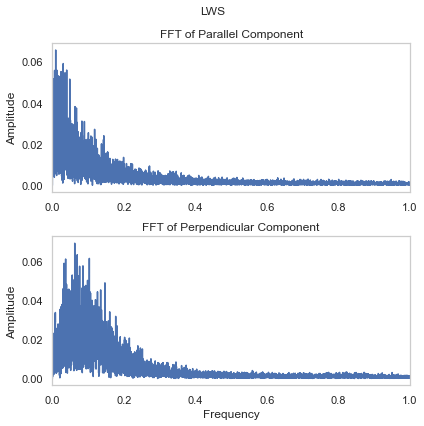

In [45]:
# # Plot the FFT results for parallel components
# f, axs = plt.subplots(2, 1, figsize=(6, 6))

# axs[0].plot(f_parallel, np.abs(parallel_fft))
# axs[0].set_ylabel('Amplitude')
# axs[0].set_title('FFT of Parallel Component')
# axs[0].grid(False)

# axs[1].plot(f_perpendicular, np.abs(perpendicular_fft))
# axs[1].set_xlabel('Frequency')
# axs[1].set_ylabel('Amplitude')
# axs[1].set_title('FFT of Perpendicular Component')
# axs[1].grid(False)


# axs[0].set_xlim(0, 1)
# axs[1].set_xlim(0, 1)

# f.suptitle('LWS')
# f.tight_layout()
# f.savefig('../../Figure/Parallelforest.jpeg', dpi=300, bbox_inches="tight")



<ipython-input-46-0dea70d437f9>:5: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(f_parallel), np.log10(parallel_fft), label='parallel')
/Users/an/Documents/MyFiles/DataAnalysis/FlyDataAnalysis/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
<ipython-input-46-0dea70d437f9>:6: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(f_perpendicular), np.log10(perpendicular_fft), label='perpendicular', alpha=0.6)
<ipython-input-46-0dea70d437f9>:25: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


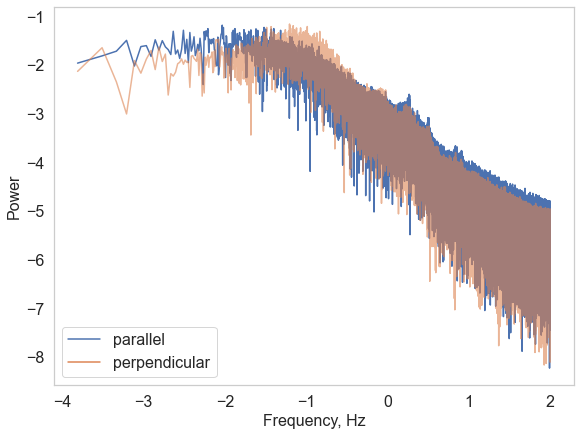

In [46]:
f,ax = plt.subplots(1,1, figsize=(8,6))

# ax.axvspan(-3.5, -1,  alpha=0.2)
# ax.axvline(1, color='r')
ax.plot(np.log10(f_parallel), np.log10(parallel_fft), label='parallel')
ax.plot(np.log10(f_perpendicular), np.log10(perpendicular_fft), label='perpendicular', alpha=0.6)

ax.set_xlabel('Frequency, Hz')
ax.set_ylabel('Power')
ax.grid(False)



# mpl_functions.adjust_spines(ax,['left', 'bottom'],spine_locations={},
#                             smart_bounds=True, xticks=[-4,-1,2],yticks=[-9,-5,-1],linewidth=1)
# ax.set_xticklabels([r'$10^{-4}$',r'$10^{-1}$', r'$10^{2}$'])
# ax.set_yticklabels([r'$10^{-9}$',r'$10^{-5}$', r'$10^{-1}$'])

f.tight_layout(pad=1)
figurefirst.mpl_functions.set_fontsize(f, 16)

# f.suptitle('Trajectory Length = 25 s')

leg = ax.legend(loc='lower left', fontsize=16)
for lh in leg.legendHandles: 
    lh.set_alpha(1)

# f.savefig('../../Figure/lws.jpeg', dpi=300, bbox_inches = "tight")

In [8]:
# R = [cos(theta), -sin(theta)]
#     [sin(theta), cos(theta)]

def calculate_rotation_matrix(angle):
    c, s = np.cos(angle), np.sin(angle)
    return np.array([[c, -s], [s, c]])

def rotate_vector(vector, rotation_matrix):
    return np.dot(rotation_matrix, vector)

dat = pd.DataFrame() # Replace this with your actual data
dat=df3
# Your specific points and velocities
points = dat[['xsrc', 'ysrc']].values
velocities = dat[['gps_linear_x', 'gps_linear_y']].values

# Calculate the rotation angle for each point
angles = np.arctan2(points[:, 1], points[:, 0])

rotated_velocities = []

# Rotate each velocity to the body-fixed frame
for angle, velocity in zip(angles, velocities):
    rotation_matrix = calculate_rotation_matrix(angle)
    rotated_velocity = rotate_vector(velocity, rotation_matrix)
    rotated_velocities.append(rotated_velocity)

# Convert the list of rotated velocities to a numpy array
rotated_velocities = np.array(rotated_velocities)

# Extract the components of the velocities in the body-fixed frame
parallel_components = rotated_velocities[:, 0]
perpendicular_components = rotated_velocities[:, 1]

# Add the results to the DataFrame
dat['parallel'] = parallel_components
dat['perpendicular'] = perpendicular_components

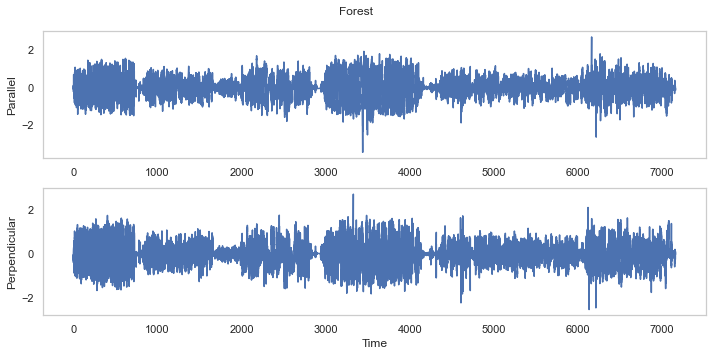

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(10, 5))

# Plot parallel_x
axs[0].plot(dat.time, dat.parallel)
axs[0].set_ylabel('Parallel')
axs[0].grid(False)
# Plot perpendicular_x
axs[1].plot(dat.time, dat.perpendicular)
axs[1].set_ylabel('Perpendicular')
axs[1].grid(False)
# Set common x-axis label
axs[-1].set_xlabel('Time')


fig.suptitle('Forest')
fig.tight_layout()

fig.savefig('../../Figure/timeseriesforest.jpeg', dpi=300, bbox_inches = "tight")

In [10]:
dt = dat.time[1] - dat.time[0]

f_parallel, parallel_fft = fft_of_data(np.array(dat.parallel), dt)
f_perpendicular, perpendicular_fft = fft_of_data(np.array(dat.perpendicular), dt)

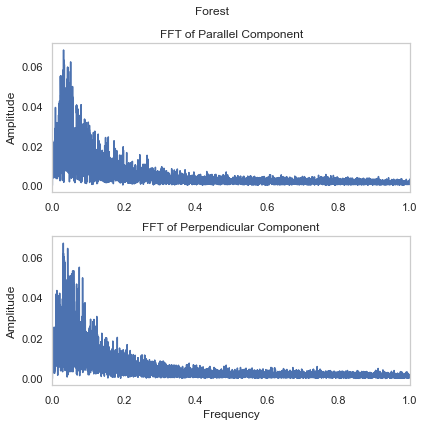

In [11]:
# Plot the FFT results for parallel components
f, axs = plt.subplots(2, 1, figsize=(6, 6))

axs[0].plot(f_parallel, np.abs(parallel_fft))
axs[0].set_ylabel('Amplitude')
axs[0].set_title('FFT of Parallel Component')
axs[0].grid(False)

axs[1].plot(f_perpendicular, np.abs(perpendicular_fft))
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('FFT of Perpendicular Component')
axs[1].grid(False)


axs[0].set_xlim(0, 1)
axs[1].set_xlim(0, 1)

f.suptitle('Forest')
f.tight_layout()
f.savefig('../../Figure/ParallelForest.jpeg', dpi=300, bbox_inches="tight")

In [64]:
# f,ax = plt.subplots(1,1, figsize=(8,6))

# # ax.axvspan(-3.5, -1,  alpha=0.2)
# # ax.axvline(1, color='r')
# ax.plot(np.log10(f_parallel), np.log10(parallel_fft), label='parallel')
# ax.plot(np.log10(f_perpendicular), np.log10(perpendicular_fft), label='perpendicular', alpha=0.6)

# ax.set_xlabel('Frequency, Hz')
# ax.set_ylabel('Power')
# ax.grid(False)



# # mpl_functions.adjust_spines(ax,['left', 'bottom'],spine_locations={},
# #                             smart_bounds=True, xticks=[-4,-1,2],yticks=[-9,-5,-1],linewidth=1)
# # ax.set_xticklabels([r'$10^{-4}$',r'$10^{-1}$', r'$10^{2}$'])
# # ax.set_yticklabels([r'$10^{-9}$',r'$10^{-5}$', r'$10^{-1}$'])

# f.tight_layout(pad=1)
# figurefirst.mpl_functions.set_fontsize(f, 16)

# # f.suptitle('Trajectory Length = 25 s')

# leg = ax.legend(loc='lower left', fontsize=16)
# for lh in leg.legendHandles: 
#     lh.set_alpha(1)